In [10]:
# Loading Libraries
import cv2
import sys
import matplotlib.pyplot as plt
faceCascade = cv2.CascadeClassifier("haarcascade_frontalface_alt.xml")
#eyeCascade = cv2.CascadeClassifier("haarcascade_eye.xml")

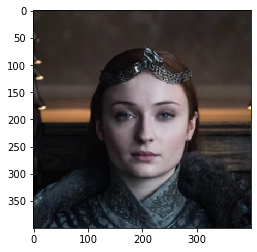

In [11]:
# Loading Images
face = cv2.cvtColor(cv2.imread('sansa.png'),cv2.COLOR_BGR2RGB)
face = cv2.resize(face,(400,400))
mst = cv2.cvtColor(cv2.imread('moustache.png'),cv2.COLOR_BGR2RGB)
plt.imshow(face)

Face DETECTED:  [[113 119 188 188]]


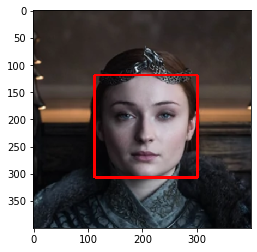

In [12]:
# Visualizing - Tyrion
face_copy = face.copy()
faces = faceCascade.detectMultiScale(face)
if len(faces) > 0:
    print("Face DETECTED: ",faces)

    faces = sorted(faces, key=lambda f:f[2]*f[3])
    
    for x,y,w,h in faces[-1:]:
        cv2.rectangle(face_copy,(x,y),(x+w,y+h),(255,0,0),3)
    plt.imshow(face_copy)
    
else:
    print("Face NOT DETECTED!! ")


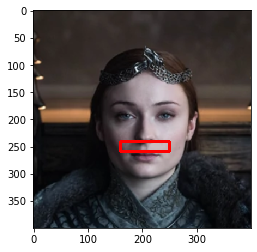

In [13]:
face_copy = face.copy()
ly = int(y+0.65*h)
ry = int(ly+0.1*h)
lx = int(x+0.25*w)
rx = int(lx+0.48*w)
cv2.rectangle(face_copy,(lx,ly),(rx,ry),(255,0,0),3)
plt.imshow(face_copy)

90 18


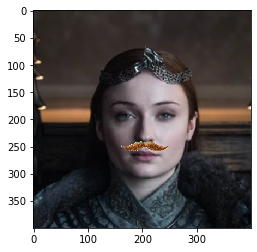

In [14]:
face_copy = face.copy()
mst_width = int((rx-lx))
mst_height = int((ry-ly))
print(mst_width,mst_height)

mst = cv2.resize(mst,(mst_width,mst_height))

for i in range(mst_height):
        for j in range(mst_width):
            for k in range(3):
                if mst[i][j][k]<235: #avoiding white
                    face_copy[int(ly)+i][int(lx)+j][k] = mst[i][j][k]
                
plt.imshow(face_copy)

In [15]:
def put_mst(mst,frame,x,y,w,h):
    ly = int(y+0.65*h)
    ry = int(ly+0.1*h)
    lx = int(x+0.25*w)
    rx = int(lx+0.48*w)
    mst_width = int((rx-lx))
    mst_height = int((ry-ly))
    
    mst = cv2.resize(mst,(mst_width,mst_height))
    #cv2.rectangle(frame,(lx,ly),(rx,ry),(255,0,0),3)

    for i in range(mst_height):
        for j in range(mst_width):
            for k in range(3):
                if mst[i][j][k]<235: #avoiding white
                    frame[int(ly)+i][int(lx)+j][k] = mst[i][j][k]
                    
    return frame
    

In [16]:
def put_glasses(glasses,frame,x,y,w,h):
    ly = int(y+h/3)
    lx = int(x+w/7)
    ry = int(ly+h/7)
    rx = int(lx+(3*w)/4)
    glass_width = int((rx-lx)*1.3)
    glass_height = int((ry-ly)*2.5)
    
    glasses = cv2.resize(glasses,(glass_width,glass_height))
    #cv2.rectangle(frame,(lx,ly),(rx,ry),(255,0,0),3)

    for i in range(glass_height):
        for j in range(glass_width):
            for k in range(3):
                if glasses[i][j][k]<235: #avoiding white
                    frame[int(ly*.9)+i][int(lx*.9)+j][k] = glasses[i][j][k]
                    
    return frame
    

In [17]:
video_capture = cv2.VideoCapture(0) 

In [18]:
while True:

    # Capture frame-by-frame
    ret, frame = video_capture.read()
    
    if ret == False:
        continue

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=5,minSize=(40,40))

    # Draw a rectangle around the faces
    for x, y, w, h in faces:
        #cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        #cv2.putText(frame,"Person Detected",(x,y),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
        frame = put_mst(mst,frame,x,y,w,h)
        
    
    cv2.imshow('Video', frame)


    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


# When everything is done, release the capture
video_capture.release()
cv2.destroyAllWindows()
